In [1]:
import os
import numpy as np
from scipy.stats import chi2
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import mne

%matplotlib notebook

In [2]:
from fooof_PLA.objs import FOOOF, FOOOFGroup
from fooof_PLA.plts.aperiodic import plot_aperiodic_params
from fooof_helper import *
from electrodes import *
from PLA_utils import *

# FOOOF Object

In [3]:
from fooof_PLA.utils.download import load_fooof_data
# Define frequency range across which to model the spectrum
freq_range = [1, 40]

## Small knee

In [16]:
# Download example data files needed for this example
freqs = load_fooof_data('freqs.npy', folder='data')
spectrum = load_fooof_data('spectrum.npy', folder='data')


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.49 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



<IPython.core.display.Javascript object>


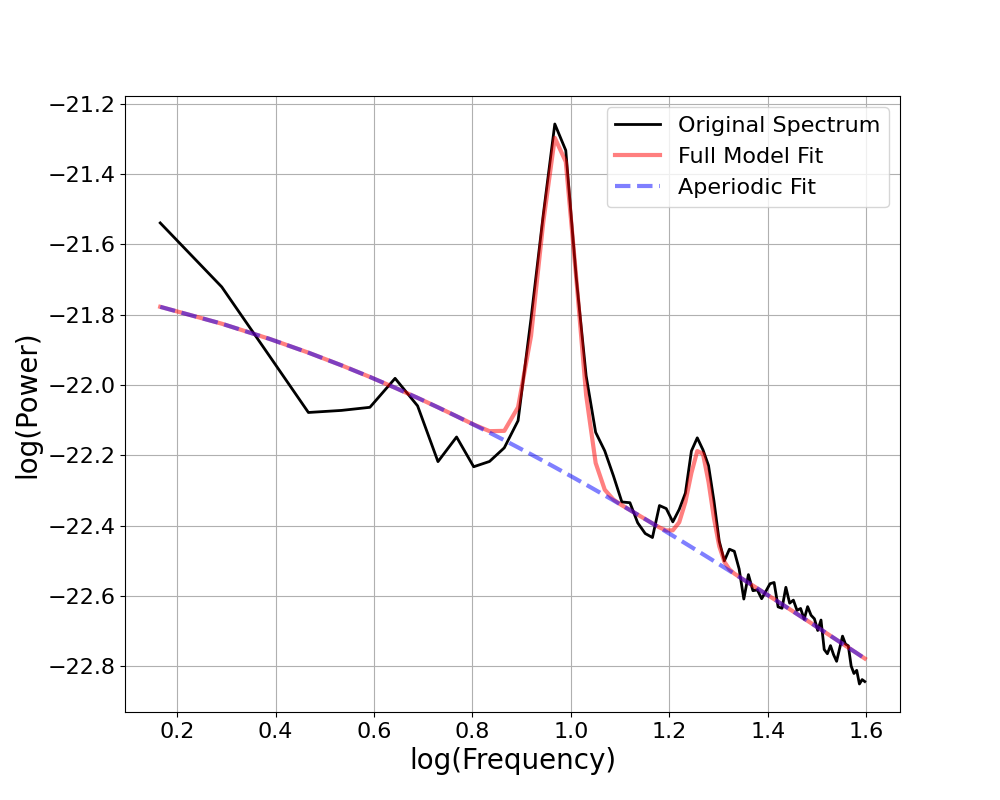

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 40 Hz                        
                                 Frequency Resolution is 0.49 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     -21.7260, 0.4308, 0.9949                                     
                                                                                                  
                                       2 peaks were found:                                        
          

In [17]:
# Initialize FOOOF object
fm = FOOOF(lorentzian = True, aperiodic_mode = 'knee', regularization_weight = 10**4)

# Model the power spectrum with FOOOF, and print out a report
fm.report(freqs, spectrum, freq_range, plt_log=True)

## Larger knee

In [14]:
# Load example data files needed for this example
freqs_lfp = load_fooof_data('freqs_lfp.npy', folder='data')
spectrum_lfp = load_fooof_data('spectrum_lfp.npy', folder='data')


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



<IPython.core.display.Javascript object>


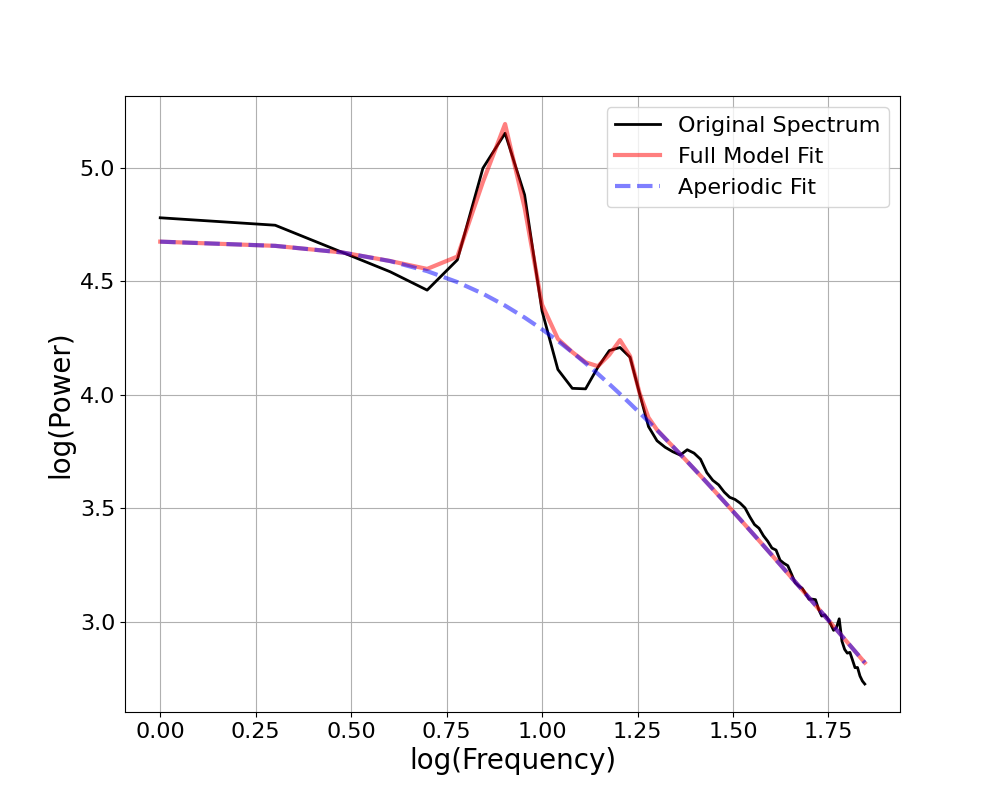

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 70 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                      4.6744, 0.9161, 1.9973                                      
                                                                                                  
                                       2 peaks were found:                                        
          

In [15]:
# Initialize FOOOF object
fm = FOOOF(lorentzian = True, aperiodic_mode = 'knee')

# Fit a power spectrum model
#  Note that this time we're specifying an optional parameter to plot in log-log
fm.report(freqs_lfp, spectrum_lfp, [1, 70], plt_log=True)

# FOOOF Group

In [9]:
# Load examples data files needed for this example
freqs_fg = load_fooof_data('group_freqs.npy', folder='data')
spectra = load_fooof_data('group_powers.npy', folder='data')

In [10]:
fg = FOOOFGroup(lorentzian = True, aperiodic_mode = 'knee',
                peak_width_limits=[1, 8], min_peak_height=0.05, max_n_peaks=6)

In [12]:
fg.fit(freqs_fg, spectra, [3, 30])

Running FOOOFGroup across 25 power spectra.


In [13]:
fg.print_results()

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 25                             
                                                                                                  
                        The model was run on the frequency range 3 - 30 Hz                        
                                 Frequency Resolution is 0.49 Hz                                  
                                                                                                  
                               Power spectra were fit with a knee.                                
                                                                                                  
          

Z:\Users\zouj\fooof-lorentzian\fooof_PLA\objs\group.py:407: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)
